# Classifying Penguins with Keras

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

penguins = pd.read_csv("/content/penguins.csv")
penguins = penguins.sample(frac = 1)
penguins = penguins.dropna()

In [ ]:
penguins_x = pd.concat([penguins[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']], pd.get_dummies(penguins['sex'])], axis = 1)
# penguins_x = penguins_x[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'female', 'male']]
penguins_x

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm,female,male
12,3200.0,41.1,17.6,182.0,True,False
151,4000.0,41.5,18.5,201.0,False,True
336,3950.0,51.9,19.5,206.0,False,True
54,2900.0,34.5,18.1,187.0,True,False
94,3300.0,36.2,17.3,187.0,True,False
...,...,...,...,...,...,...
248,4925.0,49.4,15.8,216.0,False,True
194,4300.0,45.3,13.7,210.0,True,False
234,4725.0,47.4,14.6,212.0,True,False
83,4200.0,35.1,19.4,193.0,False,True


In [ ]:
x = penguins_x.values
min_max_scaler = preprocessing.MinMaxScaler()
scaled_penguins_x = pd.DataFrame(min_max_scaler.fit_transform(x), columns=penguins_x.columns)
scaled_penguins_x

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm,female,male
0,0.138889,0.327273,0.535714,0.169492,1.0,0.0
1,0.361111,0.341818,0.642857,0.491525,0.0,1.0
2,0.347222,0.720000,0.761905,0.576271,0.0,1.0
3,0.055556,0.087273,0.595238,0.254237,1.0,0.0
4,0.166667,0.149091,0.500000,0.254237,1.0,0.0
...,...,...,...,...,...,...
328,0.618056,0.629091,0.321429,0.745763,0.0,1.0
329,0.444444,0.480000,0.071429,0.644068,1.0,0.0
330,0.562500,0.556364,0.178571,0.677966,1.0,0.0
331,0.416667,0.109091,0.750000,0.355932,0.0,1.0


In [ ]:
penguins_y = penguins['species']
print(penguins_y)
penguins_y = penguins_y.astype('category').cat.codes.to_numpy()
penguins_y

12        Adelie
151       Adelie
336    Chinstrap
54        Adelie
94        Adelie
         ...    
248       Gentoo
194       Gentoo
234       Gentoo
83        Adelie
192       Gentoo
Name: species, Length: 333, dtype: object


array([0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2,
       1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1,
       1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1,

In [ ]:
#construct the model
inputs = keras.Input(shape=(6,))
x = layers.Dense(7, activation = 'relu')(inputs)
x = layers.Dense(5, activation = 'relu')(x)
x = layers.Dense(3, activation = 'relu')(x)
outputs = layers.Dense(3, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="penguin_model")

In [ ]:
model.summary()

Model: "penguin_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_8 (Dense)             (None, 7)                 49        
                                                                 
 dense_9 (Dense)             (None, 5)                 40        
                                                                 
 dense_10 (Dense)            (None, 3)                 18        
                                                                 
 dense_11 (Dense)            (None, 3)                 12        
                                                                 
Total params: 119 (476.00 Byte)
Trainable params: 119 (476.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


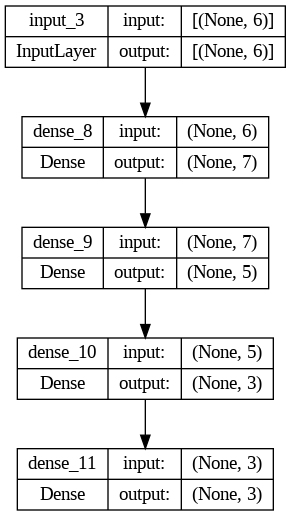

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs=100, validation_split=0.1)

scores = model.evaluate(scaled_penguins_x, penguins_y, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 1s 56ms/step - loss: 1.0923 - accuracy: 0.3244 - val_loss: 1.1177 - val_accuracy: 0.2941
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0811 - accuracy: 0.3378 - val_loss: 1.1079 - val_accuracy: 0.2941
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0738 - accuracy: 0.4482 - val_loss: 1.1020 - val_accuracy: 0.3235
Epoch 4/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 0s 8ms/step - loss: 1.0689 - accuracy: 0.4515 - val_loss: 1.0978 - val_accuracy: 0.3235
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 1.0651 - accuracy: 0.4515 - val_loss: 1.0951 - val_accuracy: 0.3235
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0623 - accuracy: 0.4515 - val_loss: 1.0926 - val_accuracy: 0.3235
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0600 - accuracy: 0.4515 - val_loss: 1.0905 - val_accuracy: 0.3235
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0577 - accuracy: 0.4515 - val_loss: 1.0889 - val_accuracy: 0.3235
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0555 - accuracy: 0.4515 - val_loss: 1.0875 - val_accuracy: 0.3235
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 1.0534 - accuracy: 0.4515 - val_loss: 1.0865 - val_accuracy: 0.3235
Epoch 11/100
5/5 [====================

In [ ]:
model_scaled = keras.Model(inputs=inputs, outputs=outputs, name="penguin_model_scaled")

model_scaled.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history_scaled = model_scaled.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 100, validation_split = 0.1)

scores = model_scaled.evaluate(scaled_penguins_x, penguins_y, verbose = 2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 1s 53ms/step - loss: 0.6910 - accuracy: 0.7926 - val_loss: 0.7598 - val_accuracy: 0.7941
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6829 - accuracy: 0.7926 - val_loss: 0.7541 - val_accuracy: 0.7941
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6785 - accuracy: 0.7926 - val_loss: 0.7509 - val_accuracy: 0.7941
Epoch 4/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 0s 12ms/step - loss: 0.6729 - accuracy: 0.7926 - val_loss: 0.7464 - val_accuracy: 0.7941
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6691 - accuracy: 0.7926 - val_loss: 0.7425 - val_accuracy: 0.7941
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6642 - accuracy: 0.7926 - val_loss: 0.7374 - val_accuracy: 0.7941
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6611 - accuracy: 0.7926 - val_loss: 0.7342 - val_accuracy: 0.7941
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6560 - accuracy: 0.7926 - val_loss: 0.7290 - val_accuracy: 0.7941
Epoch 9/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6517 - accuracy: 0.7926 - val_loss: 0.7264 - val_accuracy: 0.7941
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6478 - accuracy: 0.7926 - val_loss: 0.7223 - val_accuracy: 0.7941
Epoch 11/100
5/5 [===================

In [ ]:
model_scaled.predict(scaled_penguins_x)

11/11 [==============================] - 0s 1ms/step


array([[7.36748695e-01, 1.91833571e-01, 3.06054633e-02],
       [8.09145570e-01, 1.61056891e-01, 2.03507841e-02],
       [1.69249430e-01, 4.76259351e-01, 3.10902745e-01],
       [9.74189758e-01, 5.93888164e-02, 2.34388839e-03],
       [9.27374125e-01, 1.03422947e-01, 8.67349282e-03],
       [3.27484071e-01, 4.86852825e-01, 6.33995295e-01],
       [1.76533714e-01, 4.76878196e-01, 3.27999204e-01],
       [3.12461913e-01, 4.86012846e-01, 6.08924210e-01],
       [9.78744447e-01, 5.25675528e-02, 1.69235724e-03],
       [7.02752173e-01, 2.07788348e-01, 3.82954553e-02],
       [1.44200101e-01, 4.73953426e-01, 2.51796514e-01],
       [3.07627201e-01, 3.80053759e-01, 1.73259139e-01],
       [9.27714646e-01, 1.03500895e-01, 8.76449887e-03],
       [9.75427866e-01, 5.75839914e-02, 2.15809327e-03],
       [3.46122980e-01, 4.87868249e-01, 6.63348019e-01],
       [1.47799879e-01, 4.68040794e-01, 2.38835678e-01],
       [7.61260211e-01, 1.81671560e-01, 2.69060042e-02],
       [8.32265317e-01, 1.59098

In [ ]:
penguins['species']

12        Adelie
151       Adelie
336    Chinstrap
54        Adelie
94        Adelie
         ...    
248       Gentoo
194       Gentoo
234       Gentoo
83        Adelie
192       Gentoo
Name: species, Length: 333, dtype: object

In [ ]:
penguins_y

array([0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2,
       1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 1,
       1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1,